In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

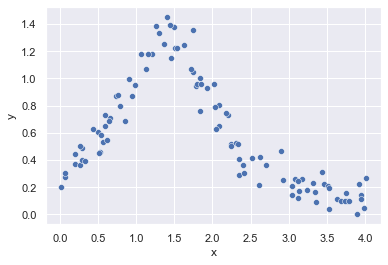

In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()


In [3]:
#df["x"] >= 1.5
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [4]:
df_1 = sp.stats.linregress(df)
from sklearn.metrics import r2_score
pendiente = df_1.slope*-1
r2 = (r2_score(X, Y) +1) *-1


print("Pendiente: ", pendiente)
print("Intercepto con el eje y: ",df_1.intercept)
print("R^2: ", r2) 


Pendiente:  0.1752093462973142
Intercepto con el eje y:  0.9310818318359751
R^2:  0.8171706568393202


## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [5]:
Y = df.loc[:, ['y']]

Y

,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500


In [6]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']

X

,x0,x1,x2
0,1,0.065859,0.004337
1,1,0.020931,0.000438
2,1,0.070312,0.004944
3,1,0.206166,0.042504
4,1,0.286572,0.082123
...,...,...,...
95,1,3.922613,15.386893
96,1,3.898473,15.198094
97,1,3.952111,15.619183
98,1,3.939211,15.517382


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores